In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from cili.util import *
from cili.cleanup import *

import matplotlib.pyplot as plt

In [3]:
samps, events = load_eyelink_dataset("/Users/knapen/Downloads/100610/unprocessed/7T/tfMRI_MOVIE1_AP/LINKED_DATA/EYETRACKER/100610_7T_MOV1_eyetrack.asc")

/Users/knapen/software/anaconda3/envs/neuro/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [15]:
samps = interp_eyelink_blinks(samps, events, interp_fields=["pup_l"])
samps = interp_zeros(samps, interp_fields=["pup_l"])

/Users/knapen/projects/cili/cili/cleanup.py:264: RuntimeWarning: invalid value encountered in less
  e_dpos = np.argmax(dfs_ravg[s_pos:e_pos] < z_thresh)  # 0 if not found


KeyboardInterrupt: 

In [10]:
first_tr_el_time = events.dframes['MSG'][events.dframes['MSG'].label == "TRIALID"].index[0]
last_tr_el_time = events.dframes['MSG'][events.dframes['MSG'].label == "TRIALID"].index[-1] + 1000

In [11]:
fMRI_el_samples = samps[(samps.index >= first_tr_el_time) & (samps.index <= last_tr_el_time)]


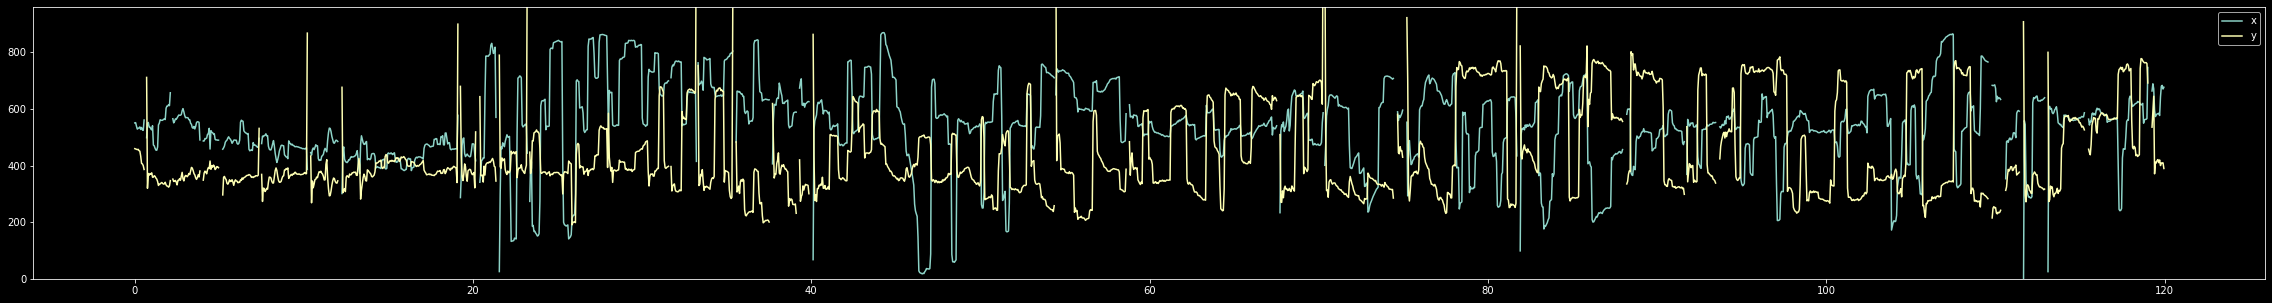

In [17]:
ssr = 50
n_seconds = 120

plt.figure(figsize=(40,5))
plt.plot(np.arange(0,n_seconds,1/(1000/ssr)), fMRI_el_samples.x_l[:n_seconds*1000:ssr], label='x')
plt.plot(np.arange(0,n_seconds,1/(1000/ssr)), fMRI_el_samples.y_l[:n_seconds*1000:ssr], label='y')
plt.ylim(0,960)
plt.legend()

In [19]:
dx_l, dy_l = np.diff(fMRI_el_samples.x_l), np.diff(fMRI_el_samples.y_l)

In [33]:
x_pixels, x_dva, sr = 960, 20, 1000
vel_l = x_dva * sr * np.sqrt(dx_l**2+dy_l**2) / x_pixels


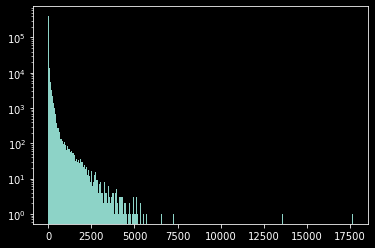

In [34]:
plt.hist(vel_l, bins=1000, log=True);